<center>
    <h1>Verbal Explanation of Spatial Temporal GNNs for Traffic Forecasting</h1>
    <h2>Data Analysis on the Metr-LA dataset</h2>
    <h3>Riccardo Spolaor</h3>
    <h4>riccardo.spolaor@studio.unibo.it - rspolaor@tudelft.nl</h4>
</center>

---

In this notebook the *Metr-LA* dataset is analysed. The ratio of missing values per node and in total is explored along with the distribution of speed on the first day and the clusters visualization. Furthermore, the three nodes with highest speed variance over the period are selected and their collected speed values are aggregated on a hour basis over the first week and plotted.

The ***Metr-LA*** dataset contains traffic information collected from loop detectors in the highway of Los Angeles County (Jagadish et al., 2014). A selection of $207$ sensors along with a 4 month span of data ranging from Mar $1^{st}$ $2012$ to Jun $30^{th}$ $2012$ is used in the experiment.

The traffic speed readings are aggregated in $5$ minutes windows.

The total number of observed traffic data points is $6,519,002$.

For more detailed informations about the used functions, look into the corresponding docstrings inside the python files, inside the `src` folder.

The dataset used in the work is the one presented in the experiment providing the original benchmark, which code is available at the following link: https://github.com/liyaguang/DCRNN.

In [1]:
import sys
import os

# Set the main path in the root folder of the project.
sys.path.append(os.path.join('..'))

In [2]:
# Settings for autoreloading

%load_ext autoreload
%autoreload 2

In [3]:
# Set the base data directory.
BASE_DATA_DIR = os.path.join('..', 'data', 'metr-la', 'raw')

# Set the base configuration directory.
BASE_CONFIG_DIR = os.path.join('..', 'config', 'kepler', 'metr-la')

# 1 Dataset Download

Firstly, the *Metr-LA* dataset is downloaded along with the dataset containing the latitude and lonngitude information of each sensor.

In [79]:
from src.data.data_extraction import get_node_values_dataframe

# Get the dataframe containing the node values at different timestamps.
node_values_df = get_node_values_dataframe(
    os.path.join(BASE_DATA_DIR, 'metr-la.h5'), turn_in_kmph=True)

In [5]:
node_values_df.head()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,103.601520,108.831888,108.027216,98.974656,107.624880,110.642400,104.808528,108.027216,95.957136,100.986336,...,73.426320,105.412032,103.802688,106.906423,107.624880,95.5548,111.044736,95.353632,111.044736,99.578160
2012-03-01 00:05:00,100.852224,110.329472,105.322624,100.494592,103.713280,109.614208,104.607360,104.607360,92.447872,101.925120,...,81.540096,112.452912,107.289600,94.236032,99.779328,98.3488,103.713280,89.944448,110.150656,101.187504
2012-03-01 00:10:00,102.998016,102.595680,96.560640,94.951296,107.021376,106.619040,103.802688,103.400352,102.796848,105.210864,...,71.012304,111.044736,90.927936,95.353632,109.636560,100.5840,105.613200,98.773488,112.424174,99.779328
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [6]:
print('Shape of the node value dataframe:', node_values_df.shape)

Shape of the node value dataframe: (34272, 207)


In [7]:
from src.data.data_extraction import get_locations_dataframe

# Get the dataframe containing the latitude and longitude of each sensor.
locations_df = get_locations_dataframe(
    os.path.join(BASE_DATA_DIR, 'graph_sensor_locations_metr_la.csv'),
    has_header=True)

In [8]:
locations_df.head()

,sensor_id,latitude,longitude
index,,,
0,773869,34.15497,-118.31829
1,767541,34.11621,-118.23799
2,767542,34.11641,-118.23819
3,717447,34.07248,-118.26772
4,717446,34.07142,-118.26572


In [9]:
print('Shape of the locations dataframe:', locations_df.shape)

Shape of the locations dataframe: (207, 3)


# 2 Spatial Analysis

The spatial network representing the city is observed. The network covers the area of central *Los Angeles* and it includes the *Glendale*, *Burbank* and *La Cañada Flintridge* areas. On the west, it extends up to the *Sepulveda* zone.

In [10]:
from src.data.data_analysis import show_kepler_map

print('Metr-LA spatial map:')
show_kepler_map(locations_df,
                os.path.join(BASE_CONFIG_DIR, 'spatial-map.json'))

Metr-LA spatial map:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'msruhg9', 'type': 'point', 'confi…

# 3 Missing Values

Next, the missing value ratio for of each node is observed.

In [11]:
from src.data.data_analysis import get_missing_values_by_location_dataframe

missing_values_by_location = get_missing_values_by_location_dataframe(
    node_values_df, locations_df)

The map visualizes the total amount of missing values per node. We can observe that peripheral zones in the west part of the map and nodes in the Glendale and Los Angeles areas experience the highest amount of missing information, in particular in presence of highway crossing zones.

In [12]:
from src.data.data_analysis import show_kepler_map

print('Metr-LA percentage of total missing values per node:')
show_kepler_map(missing_values_by_location,
                os.path.join(BASE_CONFIG_DIR, 'missing-values-map.json'))

Metr-LA percentage of total missing values per node:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'msruhg9', 'type': 'point', 'confi…

The total percentage of missing information is quite high, indicating a severe lack of information in the dataset.

In [13]:
print('Total percentage of missing values:',
      f'{(node_values_df == 0.).to_numpy().mean() * 100:.2g} %')

Total percentage of missing values: 8.1 %


# 3 Speed Analysis
In this section it is observed how the speed of the nodes evolves over time.

Firstly, the speed distribution among nodes in the peak period of a particular day is observed.
Next, the distribution of the speed during a whole week is illustrated for selected nodes.
Finally, the average speed of all nodes in selected aggregated periods is plotted.

## 3.1 Speed distribution on peak hours of a day
The speed variation analysis is performed as an example for the nodes in the peak period of the first Monday of the whole considered period. In particular, the time between $07$:$00$ am and $08$:$00$ pm is considered.

In [14]:
from src.data.data_analysis import get_day_dataframe

first_monday_df = get_day_dataframe(node_values_df, 'Monday')

In [15]:
# import numpy as np
from src.data.data_analysis import get_node_values_with_location_dataframe

location_df_with_speed = get_node_values_with_location_dataframe(
    first_monday_df, locations_df,
    metric_name='Speed', turn_datetimes_to_timestamp=False)

# Remove the rows with a speed of 0.
location_df_with_speed = location_df_with_speed[
    location_df_with_speed.Speed != 0]

The map illustrates the variation of speed during the considered time for the first Monday of the pariod.

It is immediately noticeable how no data is present for the period between $12$:$00$ am and $01$:$00$ pm meaning that there could have been an error i the system in the given time window. As previously observed the amount of missing data in this dataset is particularly large.

Furthermore we can visually observe that the periods were the speed observed by the nodes is generally low and where congestions may possible be observed is in the period before $09$:$00$ am and between $04$:$00$ and $05$:$00$ pm.

The biggest traffic jams are observed in the area of *Central Los Angeles*, in the highways connecting *Burbank* to *Central Los Angeles* and in the west-most located highway.

In [16]:
from src.data.data_analysis import show_kepler_map

print('Metr-LA variation of node speed on the first Monday:')
show_kepler_map(location_df_with_speed,
                os.path.join(BASE_CONFIG_DIR, 'speed-on-first-monday.json'))

Metr-LA variation of node speed on the first Monday:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data'], 'id': 'se0vr0gv', '…

The following map clusters together spatially close nodes and illustrates the average speed in the considered clusters over time.

The results confirm once again that the highest amount of traffic clusters are seen in the areas described before.

In [17]:
from src.data.data_analysis import show_kepler_map

print('Metr-LA speed clusters on the first Monday:')
show_kepler_map(location_df_with_speed,
                os.path.join(BASE_CONFIG_DIR, 'clusters-on-first-monday.json'))

Metr-LA speed clusters on the first Monday:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data'], 'id': 'se0vr0gv', '…

## 3.2 Speed Distribution per Day

In this section the nodes with the largest variation of speed along the period are selected as they are considered the ones that could contain the most interesting patterns.

Their speed averaged by hour is plotted for each day of the week. In particular, the first week of the period is considered as a sample.

Finally, the average speed distribution of all nodes by hour of the day and day of the week is illustrated.

In [18]:
from src.data.data_analysis import (
    get_node_values_df_of_nodes_with_largest_speed_variation)

node_values_reduced = get_node_values_df_of_nodes_with_largest_speed_variation(
    node_values_df)

In [19]:
node_values_reduced.head()

,717458,716339,717462
2012-03-01 00:00:00,103.199184,103.400352,111.648240
2012-03-01 00:05:00,102.819200,106.931968,111.581184
2012-03-01 00:10:00,104.607360,104.205024,111.849408
2012-03-01 00:15:00,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000


Generally speaking, the resulting plots illustrate that on each weekday lowest speed values are reached between the working hours $07$:$00$ am - $06$:$00$ pm. In some days, such as Monday and Tuesday, it can be observed that the average speed increases again in non-peak daily hours, such as $12$:$00$ am and $01$:$00$ pm.

Interestingly, on Friday and Saturday the low speed concentration seems to continue to until around $20$:$00$. This could be connected to the fact that they are considered weekend days and people tend to move more on these days at later hours. This late-hours low-speeds pattern is not experienced on Sunday.

Regarding the weekends, it is evident how in the early hours of the day people tend to move less. The first major speed decreases can in fact be observed after around $10$:$00$ am. On Saturday, low speed values continue until $08$:$00$ pm, while on Sunday low-speed fenomena cease to be seen at around $02$:$00$ pm.

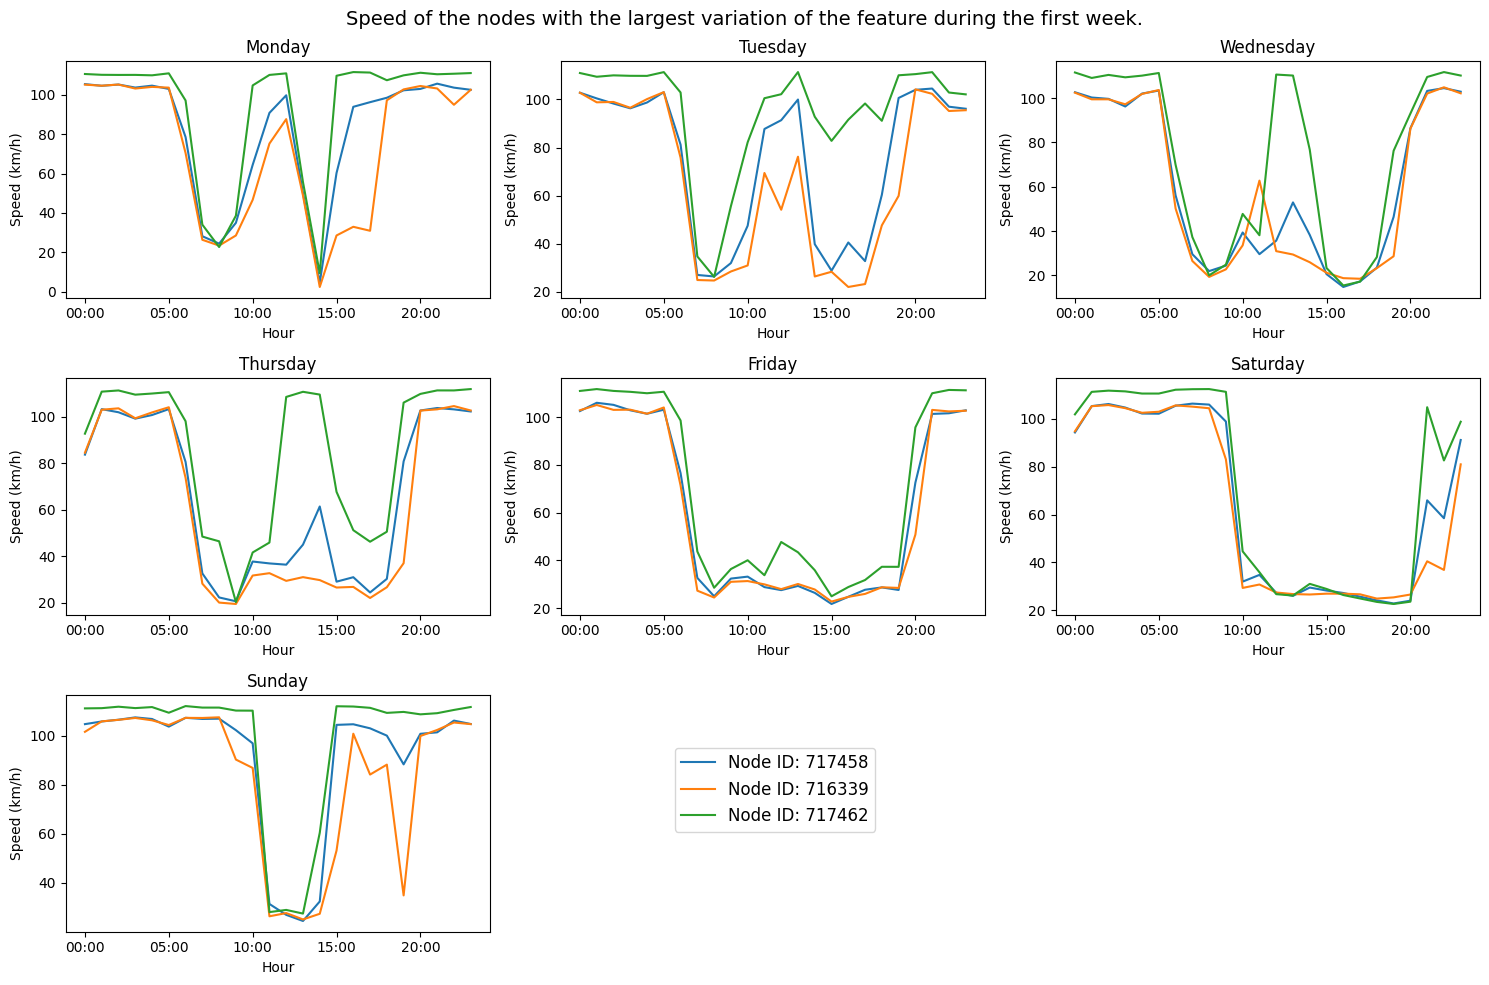

In [20]:
from src.data.data_analysis import plot_daily_speed_variation

plot_daily_speed_variation(node_values_reduced)

Regarding the average speed per hour, we can observe two troughs at the rush hours of $08:00$ a.m. and $05:00$ p.m.. These correspond to hours where people move to and come back from work respectively and where traffic flow may be higher.

The highest speed values are expectedly observed at night hours, where the traffic flow is supposedly not particularly intense.

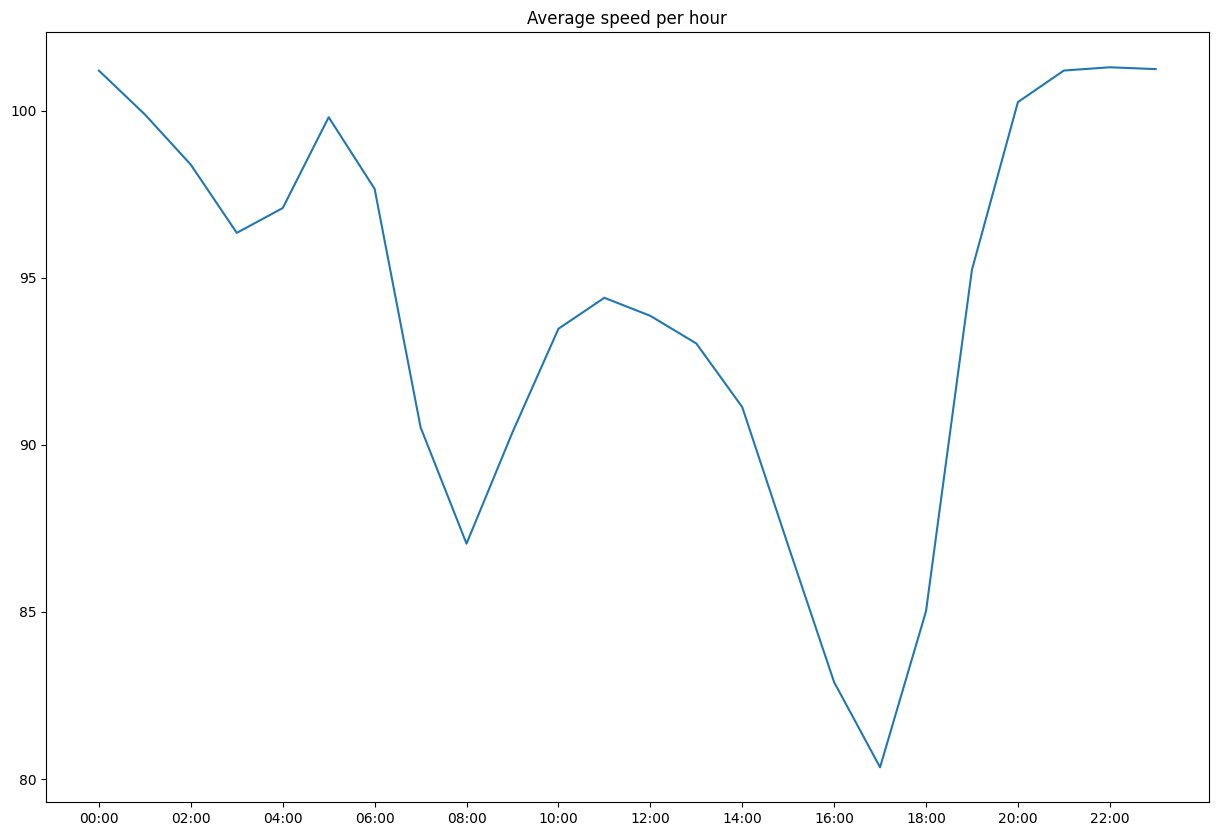

In [21]:
from src.data.data_analysis import plot_average_speed_by_hour

plot_average_speed_by_hour(node_values_df)

The average speed is generally high among each day of the week, ranging from $90$ to $100$ km/h. The lowest average speeds are experienced on weekdays, with an exception of monday. Higher average speed values are present in the weekends, probably indicating a general lower traffic flow.

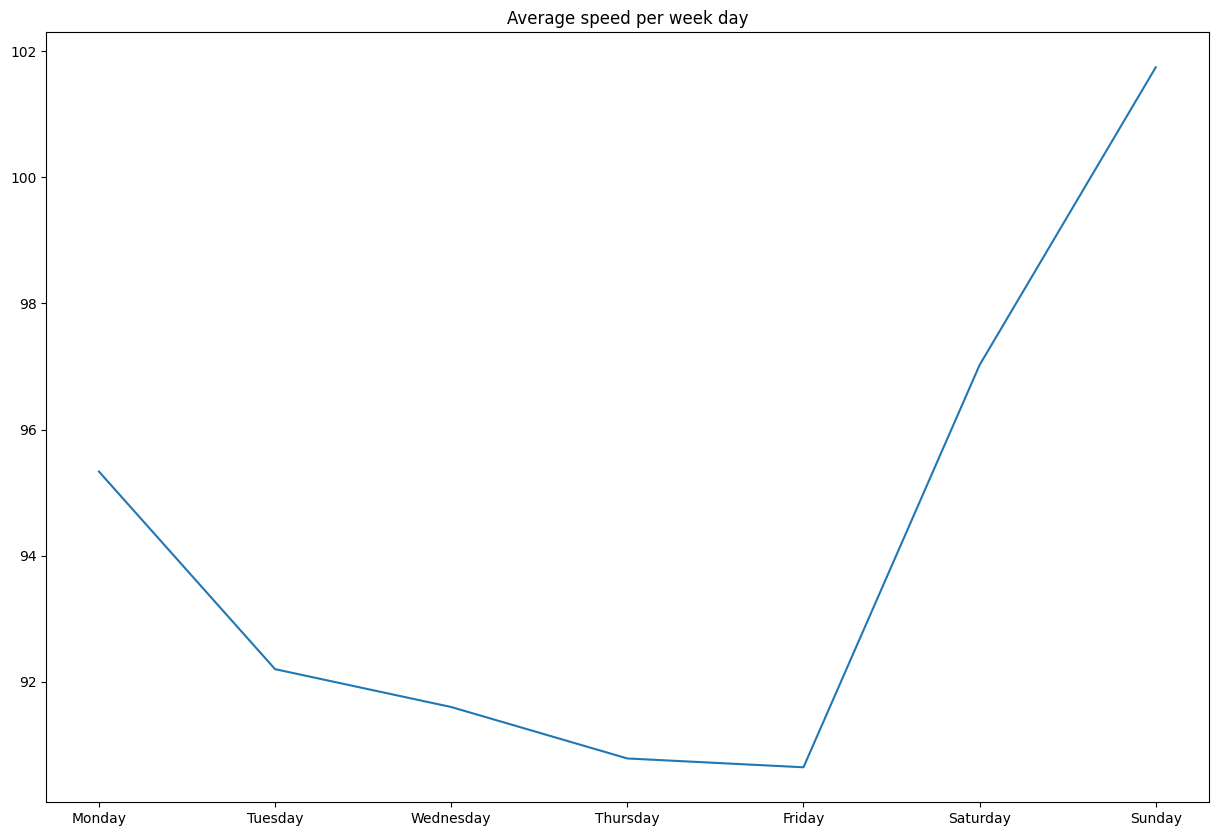

In [22]:
from src.data.data_analysis import plot_average_speed_by_day

plot_average_speed_by_day(node_values_df)

In [90]:
from src.data.data_processing import get_node_values_numpy_matrix

node_values_np, _ = get_node_values_numpy_matrix(
    node_values_df,
    time_aggregations=['time_of_day', 'day_of_week'])

In [92]:
from src.data.data_analysis import get_node_values_statistics_dataframe

statistics_df = get_node_values_statistics_dataframe(
    node_values_np, feature_names=['speed', 'time of day', 'day of week'],
    has_day_of_the_week=True)

c:\Users\riccardo\Desktop\Verbal-Explanation-of-Graph-Neural-Networks-for-Traffic-Forecasting\notebooks\..\src\data\data_analysis.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  else:


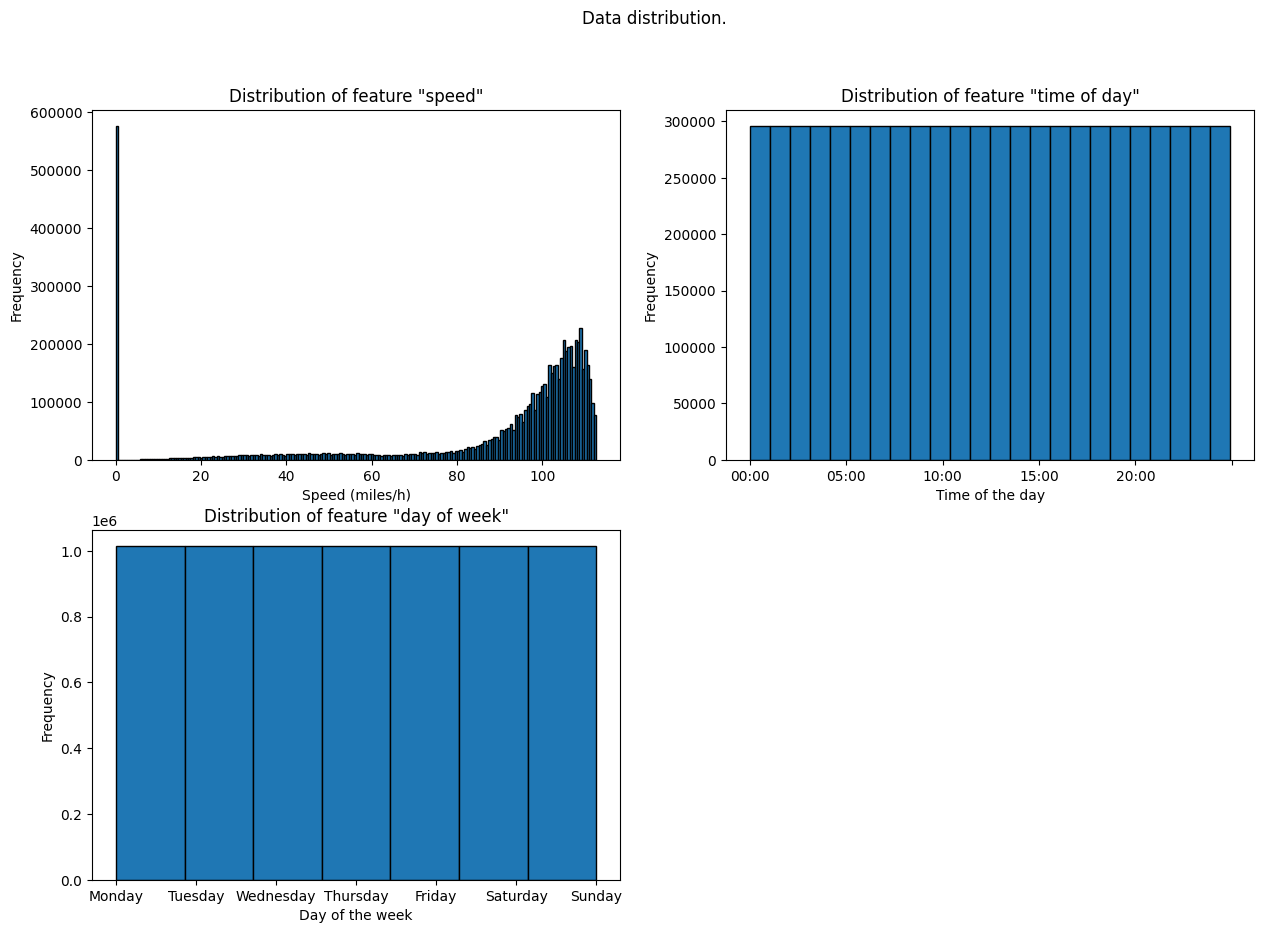

In [113]:
from src.data.data_analysis import plot_data_distribution

plot_data_distribution(
    statistics_df, bins=[200, 24, 7], 
    x_labels=['Speed (miles/h)', 'Time of the day',
              'Day of the week'],
    title='Data distribution.')